## DATASETS
Productivity - Quaterly data <br>
Employment Cost index - Quaterly data <br>
Producer Price Index - Monthly data <br>
Average Hourly earnings - Monthly data <br>
Payroll employment - Monthly data <br>
Unemployment rate - Monthly data <br>
PPI index - Monthly data <br>

In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [2]:
files = {
    "average_hourly_earnings": "./uslaborstats_data/Average_hourly_earnings.csv",
    "employment_cost_index_v1": "./uslaborstats_data/Employment_cost_index.csv",
    "payroll_employment": "./uslaborstats_data/payroll_employment.csv",
    "ppi_index_allcommodities": "PPI_index_allcomodities.csv",
    #"producer_price_index_ppi_final_demand": "ProducerPriceIndex_PPI_FinalDemand.xlsx",
    "productivity": "./uslaborstats_data/Labor_productivity.csv",
    "unemployment_rate": "Unemployment_rate.xlsx",
}

In [3]:
dataframes = {}
for key, file_path in files.items():
    if file_path.endswith('.csv'):
        dataframes[key] = pd.read_csv(file_path)
    else:
        dataframes[key] = pd.read_excel(file_path)

In [4]:
dataframes

{'average_hourly_earnings':            DATE  CEU0500000003
 0    2006-03-01          20.07
 1    2006-04-01          20.36
 2    2006-05-01          20.06
 3    2006-06-01          20.04
 4    2006-07-01          20.28
 ..          ...            ...
 212  2023-11-01          34.08
 213  2023-12-01          34.26
 214  2024-01-01          34.67
 215  2024-02-01          34.61
 216  2024-03-01          34.64
 
 [217 rows x 2 columns],
 'employment_cost_index_v1':           DATE  CIS1020000000000I
 0   2001-01-01               87.6
 1   2001-04-01               88.4
 2   2001-07-01               89.2
 3   2001-10-01               90.0
 4   2002-01-01               90.7
 ..         ...                ...
 87  2022-10-01              155.3
 88  2023-01-01              157.1
 89  2023-04-01              158.6
 90  2023-07-01              160.5
 91  2023-10-01              162.0
 
 [92 rows x 2 columns],
 'payroll_employment':            DATE  PAYEMS
 0    2000-01-01  131009
 1    2000-02-01

In [5]:
yahoo_finance = pd.read_csv('./output_us_yfinance_v2_mod.csv')

In [6]:
for df in dataframes:
    print(dataframes[df].describe())

       CEU0500000003
count     217.000000
mean       25.753456
std         3.925102
min        20.040000
25%        22.600000
50%        24.870000
75%        28.190000
max        34.670000
       CIS1020000000000I
count          92.000000
mean          118.309783
std            19.264036
min            87.600000
25%           103.100000
50%           116.000000
75%           131.200000
max           162.000000
              PAYEMS
count     291.000000
mean   139154.281787
std      8046.680936
min    129702.000000
25%    132114.500000
50%    137039.000000
75%    145523.000000
max    158133.000000
            PPIACO
count  1334.000000
mean     76.742127
std      68.800022
min      10.300000
25%      18.000000
50%      34.250000
75%     124.875000
max     280.251000
           OPHNFB
count   96.000000
mean    93.464979
std     11.219047
min     71.263000
25%     85.113750
50%     94.956000
75%    101.109500
max    112.086000
              Year        Jan        Feb        Mar        Apr  

In [7]:
yahoo_finance.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Environment Score,Social Score,Governance Score,Company Name,Industry Group,Primary Sector,Country,Ticker
0,01/10/2014,1.20,1.70,1.00,1.69,1.69,45200,NaN,NaN,NaN,Adamant DRI Processing and Minerals Group (OTC...,Advertising,Communication Services,United States,ADMG
1,01/11/2014,1.68,2.00,1.33,2.00,2.00,17800,NaN,NaN,NaN,Adamant DRI Processing and Minerals Group (OTC...,Advertising,Communication Services,United States,ADMG
2,01/12/2014,1.99,2.10,1.69,2.09,2.09,10700,NaN,NaN,NaN,Adamant DRI Processing and Minerals Group (OTC...,Advertising,Communication Services,United States,ADMG
3,01/01/2015,2.09,2.10,1.95,1.95,1.95,4000,NaN,NaN,NaN,Adamant DRI Processing and Minerals Group (OTC...,Advertising,Communication Services,United States,ADMG
4,01/02/2015,1.95,1.95,1.44,1.44,1.44,100,NaN,NaN,NaN,Adamant DRI Processing and Minerals Group (OTC...,Advertising,Communication Services,United States,ADMG


## Working with quarterly data_ employment_cost_index_v1

In [8]:
def quarter_to_month_conv(df):
    quarter_to_month = {
    "Qtr1": "01",
    "Qtr2": "04",
    "Qtr3": "07",
    "Qtr4": "10"
    }
    df['Start Month'] = df['Period'].map(quarter_to_month)

    df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Start Month'] + '-01')
    df.set_index('Date', inplace=True)
    df.drop(['Year', 'Period', 'Start Month'], axis=1, inplace=True)
    return df

In [9]:
#df_tmp = dataframes['employment_cost_index_v1']
#df = quarter_to_month_conv(df_tmp)
df = dataframes['employment_cost_index_v1']
df = df.rename(columns={'CIS1020000000000I': 'EmploymentCostIndex', 'DATE':'Date'})
df.set_index('Date', inplace=True)  # Setting 'Date' as the index
#df = df.drop(columns=['Standard Error'])

In [10]:
df

,EmploymentCostIndex
Date,
2001-01-01,87.6
2001-04-01,88.4
2001-07-01,89.2
2001-10-01,90.0
2002-01-01,90.7
...,...
2022-10-01,155.3
2023-01-01,157.1
2023-04-01,158.6


## Create and fit Cubic Spline

In [11]:

df.index = pd.to_datetime(df.index)  # Convert index to datetime if not already
date_ordinal = df.index.to_series().apply(lambda x: x.toordinal())  # Then convert to ordinal
cs = CubicSpline(date_ordinal, df['EmploymentCostIndex'])

In [12]:
# Create a full date range from the start to end date (adjust these dates as needed)
full_date_range = pd.date_range(start=df.index.min(), end='2023-12-31', freq='MS')
full_date_ordinal = full_date_range.to_series().apply(lambda x: x.toordinal())

# Use the spline to interpolate values over the full range
interpolated_values = cs(full_date_ordinal)

interpolated_df = pd.DataFrame({
    'Date': full_date_range,
    'Interpolated Employment Cost Index': interpolated_values
})
interpolated_df.set_index('Date', inplace=True)

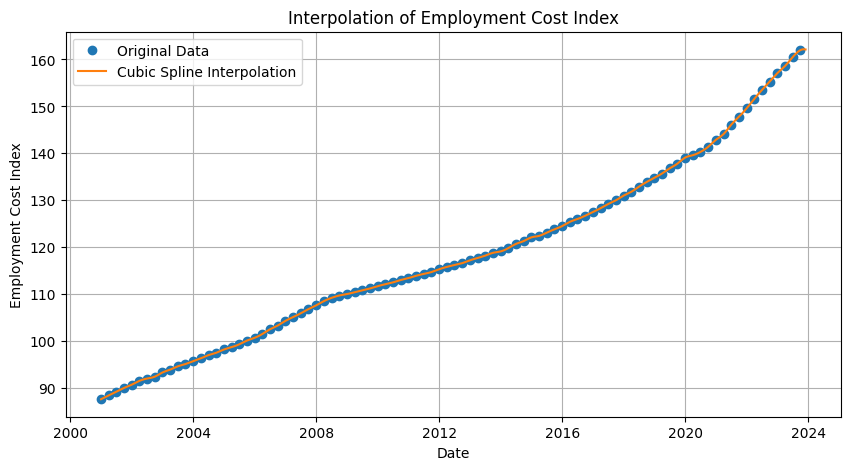

In [13]:
# Plotting the original data and the interpolated results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['EmploymentCostIndex'], 'o', label='Original Data')
plt.plot(full_date_range, interpolated_values, label='Cubic Spline Interpolation')
plt.title('Interpolation of Employment Cost Index')
plt.xlabel('Date')
plt.ylabel('Employment Cost Index')
plt.legend()
plt.grid(True)
plt.savefig('spline_plot_employmentcostindex.png', transparent=True, bbox_inches='tight', format='png')
plt.show()

In [14]:
# save the dataframe back to datagrames dictionary
dataframes['employment_cost_index_v1'] = interpolated_df

# Cleaning Labor Productivity data

In [15]:
# view of dataframe
df_prod_long = dataframes['productivity']
df_prod_long = df_prod_long.rename(columns={'OPHNFB': 'Productivity', 'DATE':'Date'})
df_prod_long.set_index('Date', inplace=True)
df_prod_long

,Productivity
Date,
2000-01-01,71.263
2000-04-01,72.691
2000-07-01,72.631
2000-10-01,73.384
2001-01-01,72.983
...,...
2022-10-01,109.252
2023-01-01,109.095
2023-04-01,109.938


df_prod = dataframes['productivity']
value_vars = df_prod.columns.tolist()[1:] # ["Qtr1", "Qtr2", "Qtr3", "Qtr4"]
prod_columns = ['Year', 'Period', 'Productivity']
df_prod_long = pd.melt(df_prod, id_vars=["Year"], value_vars=value_vars,
                    var_name="Period", value_name="Productivity")

print(df_prod_long)



df_prod_long['Start Month'] = df_prod_long['Period'].map(quarter_to_month)

df_prod_long['Date'] = pd.to_datetime(df_prod_long['Year'].astype(str) + '-' + df_prod_long['Start Month'] + '-01')

df_prod_long.set_index('Date', inplace=True)

df_prod_long.drop(['Year', 'Period', 'Start Month'], axis=1, inplace=True)

monthly_data = df_prod_long.resample('M').mean().interpolate(method='linear')

monthly_data.reset_index(inplace=True)

monthly_data['Date'] = monthly_data['Date'].dt.to_period('M').dt.to_timestamp()

monthly_data.set_index('Date', inplace=True)

print(monthly_data.head(36))
dataframes['productivity'] = monthly_data

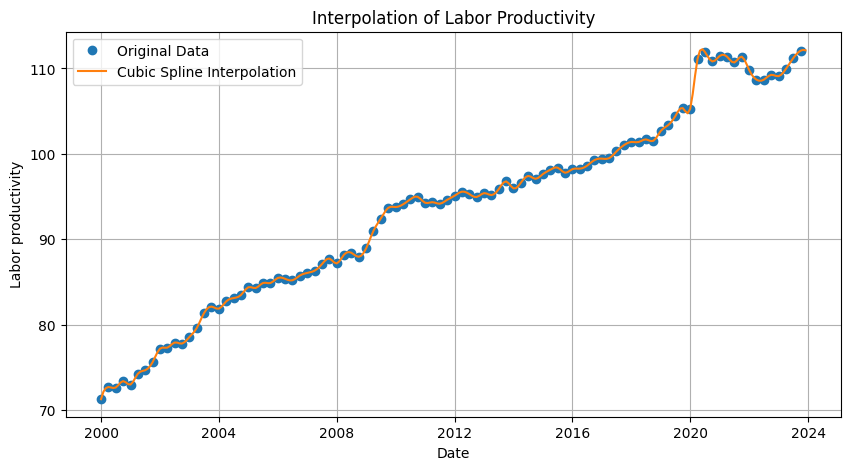

In [16]:
#df_prod_long = quarter_to_month_conv(df_prod_long)
df_prod_long = df_prod_long.sort_index()
# Convert dates to ordinal for spline fitting
df_prod_long.index = pd.to_datetime(df_prod_long.index)
date_ordinal = df_prod_long.index.to_series().apply(lambda x: x.toordinal())

# Fit cubic spline
cs = CubicSpline(date_ordinal, df_prod_long['Productivity'])

# Create a full date range from the start to end date (adjust these dates as needed)
full_date_range = pd.date_range(start=df_prod_long.index.min(), end='2023-12-31', freq='MS')
full_date_ordinal = full_date_range.to_series().apply(lambda x: x.toordinal())

# Use the spline to interpolate values over the full range
interpolated_values = cs(full_date_ordinal)

interpolated_df = pd.DataFrame({
    'Date': full_date_range,
    'Interpolated Labor Productivity': interpolated_values
})
interpolated_df.set_index('Date', inplace=True)
# Plotting the original data and the interpolated results
plt.figure(figsize=(10, 5))
plt.plot(df_prod_long.index, df_prod_long['Productivity'], 'o', label='Original Data')
plt.plot(full_date_range, interpolated_values, label='Cubic Spline Interpolation')
plt.title('Interpolation of Labor Productivity')
plt.xlabel('Date')
plt.ylabel('Labor productivity')
plt.legend()
plt.grid(True)
plt.savefig('spline_plot_laborproductivity.png',transparent=True, bbox_inches='tight', format='png')
plt.show()

In [17]:
dataframes['productivity'] = interpolated_df

In [18]:
dataframes

{'average_hourly_earnings':            DATE  CEU0500000003
 0    2006-03-01          20.07
 1    2006-04-01          20.36
 2    2006-05-01          20.06
 3    2006-06-01          20.04
 4    2006-07-01          20.28
 ..          ...            ...
 212  2023-11-01          34.08
 213  2023-12-01          34.26
 214  2024-01-01          34.67
 215  2024-02-01          34.61
 216  2024-03-01          34.64
 
 [217 rows x 2 columns],
 'employment_cost_index_v1':             Interpolated Employment Cost Index
 Date                                          
 2001-01-01                           87.600000
 2001-02-01                           87.880247
 2001-03-01                           88.128444
 2001-04-01                           88.400000
 2001-05-01                           88.661759
 ...                                        ...
 2023-08-01                          161.116685
 2023-09-01                          161.636287
 2023-10-01                          162.000000
 2023-

## Now changes need to be done
average_hourly_earnings <br>
Payroll_employment <br>
producer_price_index_ppi_final_demand <br>
unemployment_rate <br>
<br>
These data has columns ['Year', Month 1, Month 2, ......]<br>

and it should be converted to the following format:<br>
Date Unemployment_rate<br>
<Year-Month-01(day)> Rate

df_avg_hr_earnings = dataframes['average_hourly_earnings']
avg_hr_earnings_vars = df_avg_hr_earnings.columns.tolist()[1:] # ["Jan", "Feb", "Mar", "Apr".....]
prod_columns = ['Year', 'Month', 'Average Hourly Earnings']
df_avg_hr_earnings_long = pd.melt(df_avg_hr_earnings, id_vars=["Year"], value_vars=avg_hr_earnings_vars,
                    var_name="Month", value_name="Average Hourly Earnings")
df_avg_hr_earnings_long

avg_hr_earnings_vars

monthAlphabetical_to_month = {
    "Jan": "01",
    "Feb": "02",
    "Mar": "03",
    "Apr": "04",
    "May": "05",
    "Jun": "06",
    "Jul": "07",
    "Aug": "08",
    "Sep": "09",
    "Oct": "10",
    "Nov": "11",
    "Dec": "12"
}

df_avg_hr_earnings_long['Start Month'] = df_avg_hr_earnings_long['Month'].map(monthAlphabetical_to_month)

df_avg_hr_earnings_long['Date'] = pd.to_datetime(df_avg_hr_earnings_long['Year'].astype(str) + '-' + df_avg_hr_earnings_long['Start Month'] + '-01')

df_avg_hr_earnings_long.set_index('Date', inplace=True)

df_avg_hr_earnings_long.drop(['Year', 'Month', 'Start Month'], axis=1, inplace=True)

monthly_data_avg_hr_earnings_long = df_avg_hr_earnings_long.resample('M').mean().interpolate(method='linear')
#monthly_data_avg_hr_earnings_long = df_avg_hr_earnings_long['Average Hourly Earnings'].resample('M').mean().interpolate(method='spline', order=2)

monthly_data_avg_hr_earnings_long.reset_index(inplace=True)

monthly_data_avg_hr_earnings_long['Date'] = monthly_data_avg_hr_earnings_long['Date'].dt.to_period('M').dt.to_timestamp()

monthly_data_avg_hr_earnings_long.set_index('Date', inplace=True)

print(monthly_data_avg_hr_earnings_long.head(36))


dataframes['average_hourly_earnings'] = monthly_data_avg_hr_earnings_long

In [19]:
def conv_dataframe_long(key_name):
    monthAlphabetical_to_month = {
    "Jan": "01",
    "Feb": "02",
    "Mar": "03",
    "Apr": "04",
    "May": "05",
    "Jun": "06",
    "Jul": "07",
    "Aug": "08",
    "Sep": "09",
    "Oct": "10",
    "Nov": "11",
    "Dec": "12"
    }

    df_tmp = dataframes[key_name]
    vars = df_tmp.columns.tolist()[1:] # ["Jan", "Feb", "Mar", "Apr".....]
    columns = ['Year', 'Month', key_name]
    df_long = pd.melt(df_tmp, id_vars=["Year"], value_vars=vars,
                    var_name="Month", value_name=key_name)
    df_long['Start Month'] = df_long['Month'].map(monthAlphabetical_to_month)

    df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + df_long['Start Month'] + '-01')
    
    df_long.set_index('Date', inplace=True)
    
    df_long.drop(['Year', 'Month', 'Start Month'], axis=1, inplace=True)
    df_long = df_long.sort_index()
    
    return df_long

In [20]:
#dataframes['average_hourly_earnings'] = conv_dataframe_long('average_hourly_earnings')
#dataframes['payroll_employment'] = conv_dataframe_long('payroll_employment')
#dataframes['producer_price_index_ppi_final_demand'] = conv_dataframe_long('producer_price_index_ppi_final_demand')

In [21]:
dataframes['unemployment_rate'] = conv_dataframe_long('unemployment_rate')

In [22]:
dataframes

{'average_hourly_earnings':            DATE  CEU0500000003
 0    2006-03-01          20.07
 1    2006-04-01          20.36
 2    2006-05-01          20.06
 3    2006-06-01          20.04
 4    2006-07-01          20.28
 ..          ...            ...
 212  2023-11-01          34.08
 213  2023-12-01          34.26
 214  2024-01-01          34.67
 215  2024-02-01          34.61
 216  2024-03-01          34.64
 
 [217 rows x 2 columns],
 'employment_cost_index_v1':             Interpolated Employment Cost Index
 Date                                          
 2001-01-01                           87.600000
 2001-02-01                           87.880247
 2001-03-01                           88.128444
 2001-04-01                           88.400000
 2001-05-01                           88.661759
 ...                                        ...
 2023-08-01                          161.116685
 2023-09-01                          161.636287
 2023-10-01                          162.000000
 2023-

In [23]:
dataframes['ppi_index_allcommodities']['DATE'] = pd.to_datetime(dataframes['ppi_index_allcommodities']['DATE'], format='%m/%d/%Y')
dataframes['ppi_index_allcommodities']['DATE'] = dataframes['ppi_index_allcommodities']['DATE'].dt.strftime('%Y-%d-%m')


In [24]:
dataframes['ppi_index_allcommodities'] = dataframes['ppi_index_allcommodities'].rename(columns={'DATE':'Date'})

dataframes['ppi_index_allcommodities'].set_index('Date', inplace=True)


In [25]:
dataframes

{'average_hourly_earnings':            DATE  CEU0500000003
 0    2006-03-01          20.07
 1    2006-04-01          20.36
 2    2006-05-01          20.06
 3    2006-06-01          20.04
 4    2006-07-01          20.28
 ..          ...            ...
 212  2023-11-01          34.08
 213  2023-12-01          34.26
 214  2024-01-01          34.67
 215  2024-02-01          34.61
 216  2024-03-01          34.64
 
 [217 rows x 2 columns],
 'employment_cost_index_v1':             Interpolated Employment Cost Index
 Date                                          
 2001-01-01                           87.600000
 2001-02-01                           87.880247
 2001-03-01                           88.128444
 2001-04-01                           88.400000
 2001-05-01                           88.661759
 ...                                        ...
 2023-08-01                          161.116685
 2023-09-01                          161.636287
 2023-10-01                          162.000000
 2023-

In [26]:
dataframes['average_hourly_earnings'] = dataframes['average_hourly_earnings'].rename(columns={'DATE':'Date', 'CEU0500000003':'average_hourly_earnings'})

In [27]:
dataframes['average_hourly_earnings'].set_index('Date', inplace=True)

In [28]:
dataframes['payroll_employment'] = dataframes['payroll_employment'].rename(columns={'DATE':'Date', 'PAYEMS':'payroll_employment'})
dataframes['payroll_employment'].set_index('Date', inplace=True)

In [29]:
def set_dateAsIndex_removeTime(key):
    dataframes[key].index = pd.to_datetime(dataframes[key].index)
    dataframes[key].index = dataframes[key].index.strftime('%Y-%m-%d')

for fileName in files:
    set_dateAsIndex_removeTime(fileName)

In [30]:
dataframes

{'average_hourly_earnings':             average_hourly_earnings
 Date                               
 2006-03-01                    20.07
 2006-04-01                    20.36
 2006-05-01                    20.06
 2006-06-01                    20.04
 2006-07-01                    20.28
 ...                             ...
 2023-11-01                    34.08
 2023-12-01                    34.26
 2024-01-01                    34.67
 2024-02-01                    34.61
 2024-03-01                    34.64
 
 [217 rows x 1 columns],
 'employment_cost_index_v1':             Interpolated Employment Cost Index
 Date                                          
 2001-01-01                           87.600000
 2001-02-01                           87.880247
 2001-03-01                           88.128444
 2001-04-01                           88.400000
 2001-05-01                           88.661759
 ...                                        ...
 2023-08-01                          161.116685
 2023

In [31]:
for df, values in dataframes.items():
    print(df)
    print(values.columns)

average_hourly_earnings
Index(['average_hourly_earnings'], dtype='object')
employment_cost_index_v1
Index(['Interpolated Employment Cost Index'], dtype='object')
payroll_employment
Index(['payroll_employment'], dtype='object')
ppi_index_allcommodities
Index(['PPIACO'], dtype='object')
productivity
Index(['Interpolated Labor Productivity'], dtype='object')
unemployment_rate
Index(['unemployment_rate'], dtype='object')


In [32]:
# Processing: remove data before 2000 and fill missing data from 2000-2024
processed_dfs = {}
start_date = "2000-01-01"
end_date = "2024-12-01"
for name, df in dataframes.items():
    # Convert index to datetime
    df.index = pd.to_datetime(df.index)
    
    # Truncate before 2000 using the corrected datetime index
    df = df[df.index >= pd.Timestamp(start_date)]
    
    # Ensure all dates from 2000-2024 are present, aligning with the start of each month
    idx = pd.date_range(start=start_date, end=end_date, freq='MS')  # 'MS' stands for month start frequency
    df = df.reindex(idx)
    
    # Fill NaN values first forward then backward
    # df.fillna(method='ffill', inplace=True)
    # df.fillna(method='bfill', inplace=True)    
    processed_dfs[name] = df

In [33]:
for i in range(200):
    print(processed_dfs['ppi_index_allcommodities'][i:i+5])

            PPIACO
2000-01-01   128.3
2000-02-01   129.8
2000-03-01   130.8
2000-04-01   130.7
2000-05-01   131.6
            PPIACO
2000-02-01   129.8
2000-03-01   130.8
2000-04-01   130.7
2000-05-01   131.6
2000-06-01   133.8
            PPIACO
2000-03-01   130.8
2000-04-01   130.7
2000-05-01   131.6
2000-06-01   133.8
2000-07-01   133.7
            PPIACO
2000-04-01   130.7
2000-05-01   131.6
2000-06-01   133.8
2000-07-01   133.7
2000-08-01   132.9
            PPIACO
2000-05-01   131.6
2000-06-01   133.8
2000-07-01   133.7
2000-08-01   132.9
2000-09-01   134.7
            PPIACO
2000-06-01   133.8
2000-07-01   133.7
2000-08-01   132.9
2000-09-01   134.7
2000-10-01   135.4
            PPIACO
2000-07-01   133.7
2000-08-01   132.9
2000-09-01   134.7
2000-10-01   135.4
2000-11-01   135.0
            PPIACO
2000-08-01   132.9
2000-09-01   134.7
2000-10-01   135.4
2000-11-01   135.0
2000-12-01   136.2
            PPIACO
2000-09-01   134.7
2000-10-01   135.4
2000-11-01   135.0
2000-12-01  

In [34]:
processed_dfs['average_hourly_earnings'][i:i+5]

,average_hourly_earnings
2016-08-01,25.50
2016-09-01,25.73
2016-10-01,26.02
2016-11-01,25.84
2016-12-01,25.87


In [35]:
df_final = pd.DataFrame()
for df in processed_dfs.values():
    #df.index = pd.to_datetime(df.index)
    #years = df.index.str.slice(0, 4).astype(int)
    #df = df[years >= 2000]
    print(df_final)
    if df_final.empty:
        df_final = df
    else:
        df_final = pd.concat([df_final, df], axis=1, sort=False)

Empty DataFrame
Columns: []
Index: []
            average_hourly_earnings
2000-01-01                      NaN
2000-02-01                      NaN
2000-03-01                      NaN
2000-04-01                      NaN
2000-05-01                      NaN
...                             ...
2024-08-01                      NaN
2024-09-01                      NaN
2024-10-01                      NaN
2024-11-01                      NaN
2024-12-01                      NaN

[300 rows x 1 columns]
            average_hourly_earnings  Interpolated Employment Cost Index
2000-01-01                      NaN                                 NaN
2000-02-01                      NaN                                 NaN
2000-03-01                      NaN                                 NaN
2000-04-01                      NaN                                 NaN
2000-05-01                      NaN                                 NaN
...                             ...                                 ...
20

In [36]:
df_final

,average_hourly_earnings,Interpolated Employment Cost Index,payroll_employment,PPIACO,Interpolated Labor Productivity,unemployment_rate
2000-01-01,NaN,NaN,131009.0,128.3,71.263000,4.0
2000-02-01,NaN,NaN,131120.0,129.8,72.157779,4.1
2000-03-01,NaN,NaN,131604.0,130.8,72.566531,4.0
2000-04-01,NaN,NaN,131883.0,130.7,72.691000,3.8
2000-05-01,NaN,NaN,132106.0,131.6,72.645467,4.0
...,...,...,...,...,...,...
2024-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_final.to_csv('./final_data_v3.csv')